<h1>Customer Segmentation </h2>

<h2>This dataset contains simulated customer data that can be used for segmentation analysis.
It includes demographic and behavioral information about customers, which can help in identifying distinct segments within the customer base.
This can be particularly useful for targeted marketing strategies, improving customer satisfaction, and increasing sales.</h2>



<h4>Columns:</h4>

id: Unique identifier for each customer.

age: Age of the customer.

gender: Gender of the customer (Male, Female, Other).

income: Annual income of the customer (in USD).

spending_score: Spending score (1-100), indicating the customer's spending behavior and loyalty.

membership_years: Number of years the customer has been a member.

purchase_frequency: Number of purchases made by the customer in the last year.

preferred_category: Preferred shopping category (Electronics, Clothing, Groceries, Home & Garden, Sports).

last_purchase_amount: Amount spent by the customer on their last purchase (in USD).

Potential Uses:

Customer Segmentation: Identify different customer segments based on their demographic and behavioral characteristics.
Targeted Marketing: Develop targeted marketing strategies for different customer segments.
Customer Loyalty Programs: Design loyalty programs based on customer spending behavior and preferences.
Sales Analysis: Analyze sales patterns and predict future trends.

In [ ]:
 For this project we will do the customer Recency, Frequency, and Monetary - RFM.

e). RFM (Recency, Frequency, and Monetary) analysis is a marketing technique used to segment customers based on their purchasing behavior.
It considers three factors:

Recency (R): How recently a customer made a purchase.
Frequency (F): How often a customer makes a purchase.
Monetary (M): How much money a customer spends on purchase.

In [11]:
import warnings 
warnings.filterwarnings('ignore')

In [23]:
#import necessary files

import pandas as pd
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df=pd.read_csv("customer_segmentation_data.csv")

In [13]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


In [14]:
df.tail()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
995,996,57,Male,112170,57,6,1,Clothing,313.64
996,997,23,Other,65337,76,10,23,Groceries,632.83
997,998,23,Male,113097,40,5,42,Sports,75.09
998,999,22,Female,113695,63,7,44,Electronics,505.16
999,1000,36,Female,90420,7,2,31,Groceries,669.26


In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1000.0,500.50000,288.819436,1.0,250.7500,500.500,750.25,1000.00
age,1000.0,43.78300,15.042213,18.0,30.0000,45.000,57.00,69.00
income,1000.0,88500.80000,34230.771122,30004.0,57911.7500,87845.500,116110.25,149973.00
spending_score,1000.0,50.68500,28.955175,1.0,26.0000,50.000,76.00,100.00
membership_years,1000.0,5.46900,2.855730,1.0,3.0000,5.000,8.00,10.00
purchase_frequency,1000.0,26.59600,14.243654,1.0,15.0000,27.000,39.00,50.00
last_purchase_amount,1000.0,492.34867,295.744253,10.4,218.7625,491.595,747.17,999.74


In [17]:
df.duplicated().sum()

0

In [18]:
df.columns

Index(['id', 'age', 'gender', 'income', 'spending_score', 'membership_years',
       'purchase_frequency', 'preferred_category', 'last_purchase_amount'],
      dtype='object')

In [20]:
df.shape

(1000, 9)

In [21]:
df.isnull().sum()

id                      0
age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64

In [24]:
# Encode categorical variables so the computer can process them
le = LabelEncoder()
df['gender_encoded'] = le.fit_transform(df['gender'])
df['category_encoded'] = le.fit_transform(df['preferred_category'])

In [25]:
# Select relevant features for clustering
features = ['age', 'income', 'spending_score', 'membership_years', 
            'purchase_frequency', 'last_purchase_amount', 
            'gender_encoded', 'category_encoded']

In [26]:
X = df[features]

In [28]:
# Standardize features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
# 4. FINDING OPTIMAL K (ELBOW METHOD)
inertia = []
K_range = range(1, 11)
for k in K_range:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

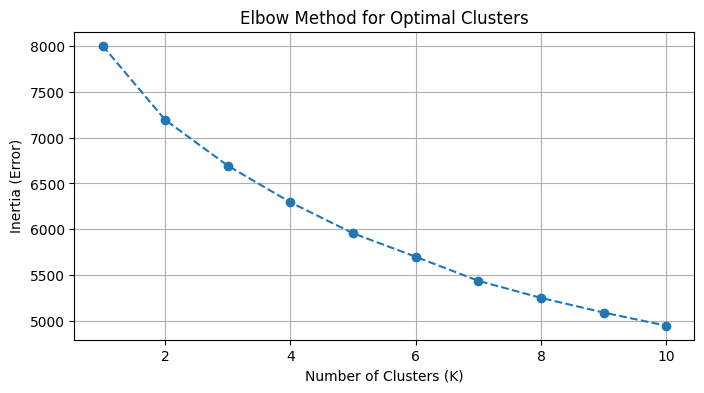

In [30]:
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Error)')
plt.grid(True)
plt.show()

In [31]:
# 5. FINAL CLUSTERING (K=4)
# Based on the elbow, we choose 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

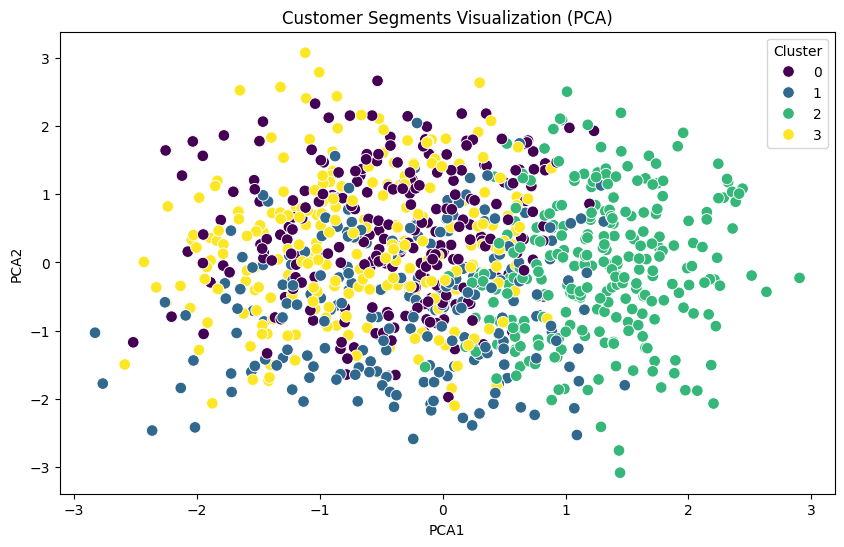

In [32]:
# 6. VISUALIZATION (PCA)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)
df['PCA1'] = pca_data[:, 0]
df['PCA2'] = pca_data[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis', s=70)
plt.title('Customer Segments Visualization (PCA)')
plt.legend(title='Cluster')
plt.show()

In [33]:
# 7. INSIGHTS & PROFILING

# Calculate the average behavior of each segment
cluster_profile = df.groupby('Cluster').agg({
    'age': 'mean',
    'income': 'mean',
    'spending_score': 'mean',
    'membership_years': 'mean',
    'purchase_frequency': 'mean',
    'last_purchase_amount': 'mean',
    'preferred_category': lambda x: x.mode()[0]  # Most common category
}).reset_index()

print("\n--- CUSTOMER SEGMENT PROFILES ---")
print(cluster_profile)




--- CUSTOMER SEGMENT PROFILES ---
   Cluster        age         income  spending_score  membership_years  \
0        0  29.536000  103999.412000       39.860000          5.652000   
1        1  54.435345  122150.120690       53.064655          4.482759   
2        2  51.041045   68285.988806       52.208955          6.194030   
3        3  40.364000   63445.896000       57.668000          5.424000   

   purchase_frequency  last_purchase_amount preferred_category  
0           31.128000            406.372920             Sports  
1           25.672414            480.025560        Electronics  
2           26.309701            695.804888        Electronics  
3           23.228000            371.655200      Home & Garden  


In [35]:
# Export the final labeled data to CSV
df.to_csv('segmented_customers_final.csv', index=False)
print("\nProject Complete! Final data saved to 'segmented_customers_final.csv'")



Project Complete! Final data saved to 'segmented_customers_final.csv'


<h2>Project Summary & Marketing Strategy</h2>

Segment 0: The Young High Earners
Profile: Younger age, high income, high purchase frequency.

Marketing Strategy: Focus on mobile-first advertising, trend-based products (Sports/Fashion), and social media influencers.

Segment 1: Affluent Seniors
Profile: Older age, very high income, high spend per transaction.

Marketing Strategy: Direct email marketing, high-end electronics, and premium customer support or concierge services.

Segment 2: The Loyal Established
Profile: Mid-to-high income, long membership history (loyal).

Marketing Strategy: Reward programs, "Anniversary" discounts, and early access to new product launches.

Segment 3: Value Seekers
Profile: Lower income, high spending score (they love a good deal).

Marketing Strategy: "Buy One Get One" offers, flash sales, and budget-friendly household or grocery bundles.